In [1]:
import pandas as pd

In [70]:
import re

def fixname(name):
    #print name
    ret =  re.sub(r'[^A-Za-z ]+',"",str(name).title())
    #print name, "->", ret
    #return ret
    return ret


def clean_col(s):
    return re.sub(r"\s+", ' ', s).strip().upper()

In [71]:
def get_data(fname):
    
    ret = pd.read_excel(fname,skiprows=3)
    ret["State"] = ret["State"].fillna(method="ffill").apply(fixname)
    ret = ret[ret["Area"] == "State Total"]
    ret.columns  = map(clean_col,ret.columns.tolist())
    
    return ret
    
get_data('data/STATE_TOTALS/2017/table-5.xls').head()
    

,STATE,AREA,UNNAMED: 2,POPULATION,VIOLENT CRIME1,MURDER AND NONNEGLIGENT MANSLAUGHTER,RAPE (REVISED DEFINITION)2,ROBBERY,AGGRAVATED ASSAULT,PROPERTY CRIME,BURGLARY,LARCENY-THEFT,MOTOR VEHICLE THEFT,UNNAMED: 13,UNNAMED: 14
9,Alabama,State Total,NaN,4874747,25551,404.0,2028.0,4217.0,18902,144160,31477.0,99842.0,12841.0,NaN,NaN
18,Alaska,State Total,NaN,739795,6133,62.0,863.0,951.0,4257,26204,4171.0,17775.0,4258.0,NaN,NaN
28,Arizona,State Total,NaN,7016270,35644,416.0,3581.0,7440.0,24207,204515,37627.0,147830.0,19058.0,NaN,NaN
39,Arkansas,State Total,NaN,3004279,16671,258.0,2053.0,1935.0,12425,92489,21862.0,63374.0,7253.0,NaN,NaN
48,California,State Total,NaN,39536653,177627,1830.0,14721.0,56622.0,104454,987114,176690.0,642033.0,168391.0,NaN,NaN


In [72]:
def get_all_data():
    
    files = {
        "2017":"data/STATE_TOTALS/2017/table-5.xls",
        "2016":"data/STATE_TOTALS/2016/Table_3_Crime_in_the_United_States_by_State_2016.xls",
        "2015":"data/STATE_TOTALS/2015/Table_5_Crime_in_the_United_States_by_State_2015.xls",
        "2014":"data/STATE_TOTALS/2014/Table_5_Crime_in_the_United_States_by_State_2014.xls",
        "2013":"data/STATE_TOTALS/2013/Table_5_Crime_in_the_United_States_by_State_2013.xls",
        "2012":"data/STATE_TOTALS/2012/Table_5_Crime_in_the_United_States_by_State_2012.xls",
        "2011":"data/STATE_TOTALS/2011/table-5.xls",
        "2010":"data/STATE_TOTALS/2010/10tbl05.xls",
        "2009":"data/STATE_TOTALS/2009/09tbl05.xls",
        "2008":"data/STATE_TOTALS/2008/08tbl05.xls",
        "2007":"data/STATE_TOTALS/2007/07tbl05.xls",
        "2006":"data/STATE_TOTALS/2006/06tbl05.xls"
    }
    
    ret = {}
    
    for y in files:
        fname = files[y]
        ret[y] = get_data(fname)
        ret[y]["YEAR"] = y
        
    return ret
        
all_data = get_all_data()



In [73]:
def combine_all_data(all_data):

    frames = []
    
    for y in all_data:
        df = all_data[y]
    
        frames.append(df.set_index(["STATE","YEAR"]))
        
    return pd.concat(frames).dropna(how="all",axis=1)
    
combined_df = combine_all_data(get_all_data())
combined_df.head()
    

/Users/jakekara/pandas/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


,,AGGRAVATED ASSAULT,AREA,BURGLARY,FORCIBLE RAPE,LARCENY- THEFT,LARCENY-THEFT,MOTOR VEHICLE THEFT,MURDER AND NONNEGLIGENT MANSLAUGHTER,POPULATION,PROPERTY CRIME,RAPE (LEGACY DEFINITION)3,RAPE (REVISED DEFINITION)2,ROBBERY,UNNAMED: 2,VIOLENT CRIME,VIOLENT CRIME1
STATE,YEAR,,,,,,,,,,,,,,,,
Alabama,2009,13093,State Total,48837,1504,NaN,117711.0,11081.0,323,4708708,177629,NaN,NaN,6259,NaN,21179,NaN
Alaska,2009,3232,State Total,3597,512,NaN,15291.0,1689.0,22,698473,20577,NaN,NaN,655,NaN,4421,NaN
Arizona,2009,16366,State Total,53412,2110,NaN,155184.0,25986.0,354,6595778,234582,NaN,NaN,8099,NaN,26929,NaN
Arkansas,2009,10830,State Total,34764,1368,NaN,68171.0,6103.0,179,2889450,109038,NaN,NaN,2582,NaN,14959,NaN
California,2009,99681,State Total,230137,8713,NaN,615456.0,164021.0,1972,36961664,1009614,NaN,NaN,64093,NaN,174459,NaN


In [74]:
for c in combined_df.columns:
    print c

AGGRAVATED ASSAULT
AREA
BURGLARY
FORCIBLE RAPE
LARCENY- THEFT
LARCENY-THEFT
MOTOR VEHICLE THEFT
MURDER AND NONNEGLIGENT MANSLAUGHTER
POPULATION
PROPERTY CRIME
RAPE (LEGACY DEFINITION)3
RAPE (REVISED DEFINITION)2
ROBBERY
UNNAMED: 2
VIOLENT CRIME
VIOLENT CRIME1


In [86]:
%matplotlib inline

In [134]:
def timetable(df, col):
    ret = df.copy()
    ret[col] = pd.to_numeric(ret[col])
    ret["POPULATION"] = pd.to_numeric(ret["POPULATION"])

    ret["_RATE"] = ret[col] * 100000 / ret["POPULATION"]
    return pd.pivot_table(ret,
                          values="_RATE",
                          columns="YEAR",
                          index="STATE")

timetable(combined_df, "MURDER AND NONNEGLIGENT MANSLAUGHTER").loc["Connecticut"]

YEAR
2006    3.081480
2007    3.026575
2008    3.513029
2009    3.041252
2010    3.637282
2011    3.574711
2012    4.066459
2013    2.391493
2014    2.391096
2015    3.258249
2016    2.180932
2017    2.842664
Name: Connecticut, dtype: float64

In [174]:
timetable(combined_df, "PROPERTY CRIME").loc["Connecticut"].to_frame()

,Connecticut
YEAR,
2006,2504.102221
2007,2399.902464
2008,2458.749042
2009,2335.823560
2010,2193.169352
2011,2167.419916
2012,2140.015993
2013,1974.094013
2014,1920.383732


In [175]:
timetable(combined_df, "BURGLARY").loc["Connecticut"].to_frame()

,Connecticut
YEAR,
2006,419.252518
2007,432.914400
2008,428.732351
2009,428.418594
2010,424.498831
2011,437.874175
2012,409.737555
2013,358.501479
2014,332.390148


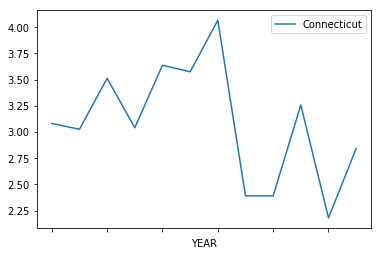

In [135]:
timetable(combined_df, "MURDER AND NONNEGLIGENT MANSLAUGHTER").loc["Connecticut"].to_frame().plot()

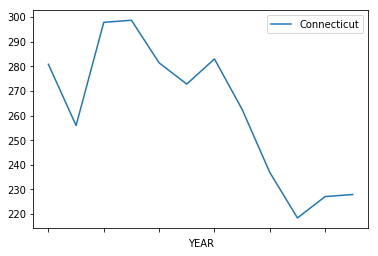

In [146]:
pd.concat([timetable(combined_df, "VIOLENT CRIME").loc["Connecticut"].to_frame(),
           timetable(combined_df, "VIOLENT CRIME1").loc["Connecticut"].to_frame()]).plot()

In [147]:
timetable(combined_df, "MURDER AND NONNEGLIGENT MANSLAUGHTER").loc["Connecticut"].to_frame()

,Connecticut
YEAR,
2006,3.081480
2007,3.026575
2008,3.513029
2009,3.041252
2010,3.637282
2011,3.574711
2012,4.066459
2013,2.391493
2014,2.391096


In [138]:
# FORCIBLE RAPE
# RAPE (LEGACY DEFINITION)3
#RAPE (REVISED DEFINITION)2

timetable(combined_df, "RAPE (REVISED DEFINITION)2").loc["Connecticut"].to_frame()

,Connecticut
YEAR,
2013,26.556695
2014,21.742292
2015,21.526721
2016,21.333992
2017,23.326563


In [139]:
timetable(combined_df, "RAPE (LEGACY DEFINITION)3").loc["Connecticut"].to_frame()

,Connecticut
YEAR,
2013,18.575783
2014,15.875765
2015,16.207699
2016,15.685937


In [140]:
timetable(combined_df, "FORCIBLE RAPE").loc["Connecticut"].to_frame()

,Connecticut
YEAR,
2006,18.146495
2007,18.787606
2008,19.250257
2009,18.503318
2010,16.311812
2011,19.158217
2012,25.596412


In [141]:
## Pull in national totals

In [142]:
national_df = pd.read_excel("data/2017/Table_1_Crime_in_the_United_States_by_Volume_and_Rate_per_100000_Inhabitants_1998-2017.xls",
                           skiprows=3)
national_df.columns = map(clean_col, national_df.columns.tolist())
national_df = national_df.dropna(thresh=10)
national_df["YEAR"] = national_df["YEAR"].apply(lambda x: str(x)[:4])

national_df

,YEAR,POPULATION1,VIOLENT CRIME2,VIOLENT CRIME RATE,MURDER AND NONNEGLIGENT MANSLAUGHTER,MURDER AND NONNEGLIGENT MANSLAUGHTER RATE,RAPE (REVISED DEFINITION)3,RAPE (REVISED DEFINITION) RATE3,RAPE (LEGACY DEFINITION)4,RAPE (LEGACY DEFINITION) RATE4,...,PROPERTY CRIME,PROPERTY CRIME RATE,BURGLARY,BURGLARY RATE,LARCENY- THEFT,LARCENY- THEFT RATE,MOTOR VEHICLE THEFT,MOTOR VEHICLE THEFT RATE,UNNAMED: 22,UNNAMED: 23
0,1998,270248003.0,1533887.0,567.6,16974.0,6.3,NaN,NaN,93144.0,34.5,...,10951827,4052.5,2332735,863.2,7376311.0,2729.5,1242781.0,459.9,NaN,NaN
1,1999,272690813.0,1426044.0,523,15522.0,5.7,NaN,NaN,89411.0,32.8,...,10208334,3743.6,2100739,770.4,6955520.0,2550.7,1152075.0,422.5,,NaN
2,2000,281421906.0,1425486.0,506.5,15586.0,5.5,NaN,NaN,90178.0,32.0,...,10182584,3618.3,2050992,728.8,6971590.0,2477.3,1160002.0,412.2,NaN,NaN
3,2001,285317559.0,1439480.0,504.5,16037.0,5.6,NaN,NaN,90863.0,31.8,...,10437189,3658.1,2116531,741.8,7092267.0,2485.7,1228391.0,430.5,NaN,NaN
4,2002,287973924.0,1423677.0,494.4,16229.0,5.6,NaN,NaN,95235.0,33.1,...,10455277,3630.6,2151252,747.0,7057379.0,2450.7,1246646.0,432.9,NaN,NaN
5,2003,290788976.0,1383676.0,475.8,16528.0,5.7,NaN,NaN,93883.0,32.3,...,10442862,3591.2,2154834,741.0,7026802.0,2416.5,1261226.0,433.7,NaN,NaN
6,2004,293656842.0,1360088.0,463.2,16148.0,5.5,NaN,NaN,95089.0,32.4,...,10319386,3514.1,2144446,730.3,6937089.0,2362.3,1237851.0,421.5,,NaN
7,2005,296507061.0,1390745.0,469,16740.0,5.6,NaN,NaN,94347.0,31.8,...,10174754,3431.5,2155448,726.9,6783447.0,2287.8,1235859.0,416.8,NaN,
8,2006,299398484.0,1435123.0,479.3,17309.0,5.8,,NaN,94472.0,31.6,...,10019601,3346.6,2194993,733.1,6626363.0,2213.2,1198245.0,400.2,NaN,NaN
9,2007,301621157.0,1422970.0,471.8,17128.0,5.7,NaN,NaN,92160.0,30.6,...,9882212,3276.4,2190198,726.1,6591542.0,2185.4,1100472.0,364.9,NaN,NaN


In [169]:
for c in national_df.columns:
    print c

YEAR
POPULATION1
VIOLENT CRIME2
VIOLENT CRIME RATE
MURDER AND NONNEGLIGENT MANSLAUGHTER
MURDER AND NONNEGLIGENT MANSLAUGHTER RATE
RAPE (REVISED DEFINITION)3
RAPE (REVISED DEFINITION) RATE3
RAPE (LEGACY DEFINITION)4
RAPE (LEGACY DEFINITION) RATE4
ROBBERY
ROBBERY RATE
AGGRAVATED ASSAULT
AGGRAVATED ASSAULT RATE
PROPERTY CRIME
PROPERTY CRIME RATE
BURGLARY
BURGLARY RATE
LARCENY- THEFT
LARCENY- THEFT RATE
MOTOR VEHICLE THEFT
MOTOR VEHICLE THEFT RATE
UNNAMED: 22
UNNAMED: 23


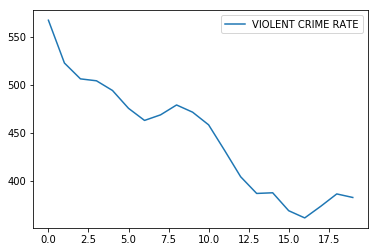

In [143]:
national_df[national_df["YEAR"] >= 2006]["VIOLENT CRIME RATE"].to_frame().plot()

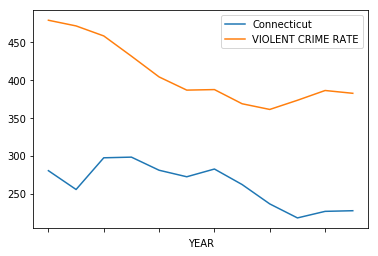

In [160]:
def us_versus_ct(col_names, nat_col):
    pd.concat([timetable(combined_df, x).loc["Connecticut"].to_frame() for x in col_names])\
    .join(
        national_df[national_df["YEAR"].apply(lambda x: int(x) >= 2006)].set_index("YEAR")[nat_col].to_frame(),
        how="outer"
    ).plot()
   
    
    
us_versus_ct(["VIOLENT CRIME","VIOLENT CRIME1"],
             "VIOLENT CRIME RATE")

In [145]:
national_df[national_df["YEAR"] >= 2006].set_index("YEAR")["VIOLENT CRIME RATE"].to_frame()

,VIOLENT CRIME RATE
YEAR,
1998,567.6
1999,523
2000,506.5
2001,504.5
2002,494.4
2003,475.8
2004,463.2
2005,469
2006,479.3


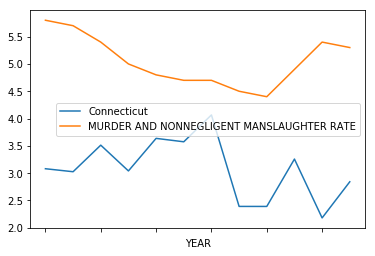

In [161]:
#MURDER AND NONNEGLIGENT MANSLAUGHTER RATE
us_versus_ct(["MURDER AND NONNEGLIGENT MANSLAUGHTER"],
             "MURDER AND NONNEGLIGENT MANSLAUGHTER RATE")

In [ ]:
us_versus_ct(["MURDER AND NONNEGLIGENT MANSLAUGHTER"],
             "MURDER AND NONNEGLIGENT MANSLAUGHTER RATE")

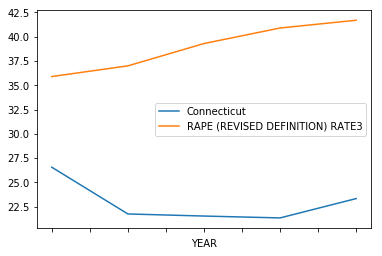

In [172]:

us_versus_ct(["RAPE (REVISED DEFINITION)2",
              #"RAPE (LEGACY DEFINITION)3",
             #"FORCIBLE RAPE",
             ], 
    "RAPE (REVISED DEFINITION) RATE3")
    #"RAPE (LEGACY DEFINITION) RATE4")

In [ ]:
us_versus_ct(["PROPERTY CRIME"],
             "MURDER AND NONNEGLIGENT MANSLAUGHTER RATE")